## MP Phase 1

**S11 - Group x**

**Submitted By:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**Chua Ching, Janine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Ileto, Maxine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Dytoc, Ayisha**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Tan, Jared**

# Introduction

## Target Task

# Dataset Description

## Brief Description

## Data Collection Process


## Dataset Features


## Dataset Variables

The dataset contains a total of 20 variables (columns). The following are the descriptions of each variable in the dataset:

- **`uuid`**: The unique identifier of the snapshot
- **`current_minute`**: The current minute of the in-play match. Important: the 15 min half-time break is included, so a match will have a total of 105 min. A current_minute of 70 corresponds to the actual match time of 55.
- **`home_score`**: Goals scored by the home team as of this current_minute
- **`away_score`**:  Goals scored by the away team as of this current_minute
- **`home_yellow_cards`**: Yellow cards given to the home team as of this current_minute
- **`away_yellow_cards`**: Yellow cards given to the away team as of this current_minute
- **`home_red_cards`**: Red cards given to the home team as of this current_minute
- **`away_red_cards`**: Red cards given to the away team as of this current_minute
- **`home_attacks`**: Attacks attempted by the home team as of this current_minute
- **`away_attacks`**: Attacks attempted by the away team as of this current_minute
- **`home_dangerous_attacks`**: Dangerous attacks attempted by the home team as of this current_minute
- **`away_dangerous_attacks`**: Dangerous attacks attempted by the away team as of this current_minute
- **`home_corners`**: Corners awarded to the home team as of this current_minute
- **`away_corners`**: Corners awarded to the away team as of this current_minute
- **`home_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the home team as of this current_minute
- **`away_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the away team as of this current_minute
- **`home_on_target`**:  Shots that had to be cleared by the goalkeeper that were attempted to 
the home team as of this current_minute
- **`away_on_target`**: Shots that had to be cleared by the goalkeeper that were attempted to 
the away team as of this current_minute
- **`home_possession`**: How much ball possession in % did the home team have until this 
current_minute
- **`away_possession`**: The unique identifier of the snapshot

# List of requirements

List all python libraries and modules used

In [1]:
# Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing and cleaning

The data used in this project is stored in the `sports.csv` file. This data will be stored in a variable called `df`

Below is a sample of the first 5 rows of the dataset.

In [2]:
df = pd.read_csv('sports.csv')
df.head()

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,26,4,1,4,0,4,6,48,52,1
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,1
2,549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,62,38,4
3,287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,...,25,1,0,0,2,0,0,55,45,2
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,46,1,1,0,3,4,4,45,55,0


Given that we will only be using the specific features in the data, we will extract only the features that are relevant to the project. The following features will be extracted and pre-processed: 
- **`current_minute`**
- **`home_score`**
- **`away_score`**
- **`home_attacks`**
- **`away_attacks`**
- **`home_dangerous_attacks`**
- **`away_dangerous_attacks`**
- **`home_on_target`**
- **`away_on_target`**

In [4]:
df = df[["current_minute","home_score", 'away_score', 'home_attacks','away_attacks','home_dangerous_attacks','away_dangerous_attacks','home_on_target','away_on_target']]
df.head()

,current_minute,home_score,away_score,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_on_target,away_on_target
0,94,1,2,39,45,29,26,4,6
1,91,2,0,0,0,0,0,0,0
2,3,0,0,3,1,1,0,0,0
3,17,0,0,41,46,11,25,0,0
4,76,1,0,69,78,21,46,4,4


We will now begin cleaning the data.

First, we will check if there are any null or missing values.

In [5]:
df.isnull().any()

current_minute            False
home_score                False
away_score                False
home_attacks              False
away_attacks              False
home_dangerous_attacks    False
away_dangerous_attacks    False
home_on_target            False
away_on_target            False
dtype: bool

Based on the output above, we can see that they are all `False`, indicating that there are no null or missing values.

We will next check if the data types of the variables are consistent.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   current_minute          7000 non-null   int64
 1   home_score              7000 non-null   int64
 2   away_score              7000 non-null   int64
 3   home_attacks            7000 non-null   int64
 4   away_attacks            7000 non-null   int64
 5   home_dangerous_attacks  7000 non-null   int64
 6   away_dangerous_attacks  7000 non-null   int64
 7   home_on_target          7000 non-null   int64
 8   away_on_target          7000 non-null   int64
dtypes: int64(9)
memory usage: 492.3 KB


Based on the output, we can see that all items in the data are non-null and have the integer data type.

We will now check if there are any default values within the data, which can be indicated by values that go beyond the data range (ex. below the minimum values or above the maximum)

In [8]:
df.describe()

,current_minute,home_score,away_score,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_on_target,away_on_target
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,59.491571,0.796000,0.623143,46.365429,43.325143,27.611429,24.201286,2.172143,1.796000
std,35.827892,1.070503,0.923248,36.004908,33.428276,22.977844,20.457007,2.320374,2.026002
min,-348.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,15.000000,14.000000,8.000000,7.000000,0.000000,0.000000
50%,70.000000,0.000000,0.000000,43.000000,41.000000,25.000000,21.000000,2.000000,1.000000
75%,88.000000,1.000000,1.000000,71.000000,67.000000,42.000000,36.000000,3.000000,3.000000
max,583.000000,8.000000,9.000000,255.000000,183.000000,134.000000,140.000000,22.000000,19.000000


Based on the output above, we can note the following:
- The minimum value of **`current_minute`** is a negative value, while the maximum value goes beyond the total match time. 
- The minimum and maximum values of the remaining features are within the proper range.

Since for this project we will be predicting whether the home team is winning or losing, we would ideally want the match to have sufficient data to be able to accurately predict this. If the match has barely begun, there might not be enough data to create an accurate prediction, and this may also skew the training data.

With this, we will only use the match data for games that are either from the break time (eg. the middle of the game) or in the game's second half.

In [12]:
df = df[ df['current_minute'] >= 45 ]
df = df[ df['current_minute'] <= 105 ]
df['current_minute'].describe()

count    4112.000000
mean       82.137889
std        14.433778
min        45.000000
25%        73.000000
50%        83.000000
75%        94.000000
max       105.000000
Name: current_minute, dtype: float64

In [13]:
len(df)

4112

As shown, the values for **`current_minute`** are now within the appropriate time range.

This now leaves us with 4112 items in the dataset.

We will now drop any duplicated data.

In [14]:
df.drop_duplicates()
len(df)

4112

The number of rows in the dataset did not change, indicating that there were no duplicates.

**separator**

Check if there are any default values for integer values

do this by checking if any negative values

In [6]:
(df_integer_variables.values <= 0).any()

True

As you can see, current_minute's minimum value is below 0, which is invalid

In [7]:
df_integer_variables.describe()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,59.491571,0.796000,0.623143,0.522429,0.603143,0.009286,0.015714,46.365429,43.325143,27.611429,24.201286,2.377714,1.994286,3.067857,2.592286,2.172143,1.796000,51.584286,48.412571,1.416857
std,35.827892,1.070503,0.923248,0.922212,1.018021,0.097399,0.125520,36.004908,33.428276,22.977844,20.457007,2.464647,2.197746,3.157366,2.747621,2.320374,2.026002,10.532584,10.534579,1.419035
min,-348.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,14.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,42.000000,0.000000
50%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,41.000000,25.000000,21.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,51.000000,49.000000,1.000000
75%,88.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,71.000000,67.000000,42.000000,36.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000,58.000000,54.000000,2.000000
max,583.000000,8.000000,9.000000,8.000000,8.000000,2.000000,2.000000,255.000000,183.000000,134.000000,140.000000,16.000000,18.000000,24.000000,18.000000,22.000000,19.000000,100.000000,100.000000,10.000000


Let's get the total number of rows with negative values for current_minute

In [8]:
(df_integer_variables['current_minute'] < 0 ).sum()

14

We will now remove all df rows with negative values for current_minute

In [9]:
df = df[ df['current_minute'] >= 0 ]
len(df)

6986

remove all df rows that are within 45th to 105th minute

In [10]:
df = df[ df['current_minute'] >= 45 ]
df = df[ df['current_minute'] <= 105 ]
len(df)

4112

As you can see, the rows were removed

we will now drop all duplicates

In [11]:
df.drop_duplicates()

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,26,4,1,4,0,4,6,48,52,1
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,1
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,46,1,1,0,3,4,4,45,55,0
5,30db4b3b-928c-4796-b58e-91022a51d38c,92,2,0,0,0,0,0,87,72,...,35,3,2,4,4,3,3,50,50,0
7,421098ce-53a1-42b0-a8ba-899e2f56f501,94,2,2,0,0,0,0,39,32,...,16,7,3,4,2,7,4,50,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,6c83c280-838c-4ca9-9983-f01ed54f8dda,101,2,0,0,1,0,0,106,76,...,28,3,0,7,6,8,0,60,40,0
6994,b4b59656-500f-4656-9308-ce934561c60b,67,2,1,1,2,0,0,79,61,...,35,4,4,3,1,3,3,53,47,0
6996,4bcfd248-5f39-4af2-b465-5358c9e7088e,101,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,50,50,0
6997,deccdc2c-625e-495a-9b06-02d540d4cd24,78,1,0,0,0,0,0,71,60,...,40,7,0,5,5,7,0,61,39,2


The number of rows did not change, indicating that there are no duplicates

Add column of if home_score > away_score

In [12]:
add_new_column_lambda = lambda row: True if (row["home_score"] > row["away_score"]) else False
added_column_df = df.apply(add_new_column_lambda, axis=1)

In [19]:
df["home_is_winning"] = added_column_df
df.head()

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta,home_is_winning
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,4,1,4,0,4,6,48,52,1,False
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,50,50,1,True
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,1,1,0,3,4,4,45,55,0,True
5,30db4b3b-928c-4796-b58e-91022a51d38c,92,2,0,0,0,0,0,87,72,...,3,2,4,4,3,3,50,50,0,True
7,421098ce-53a1-42b0-a8ba-899e2f56f501,94,2,2,0,0,0,0,39,32,...,7,3,4,2,7,4,50,50,0,False


In [20]:
len(df)

4112

This is a final check of the dataframe

In [21]:
df.describe()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
count,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000,4112.000000
mean,82.137889,1.088278,0.844358,0.710117,0.822957,0.013619,0.021887,62.544261,58.400778,37.529669,32.850924,3.221304,2.717169,4.200146,3.542072,2.959387,2.464737,51.569796,48.427043,0.937743
std,14.433778,1.180701,1.022061,0.998474,1.116767,0.117996,0.147986,34.430064,32.086493,22.489363,20.344907,2.569710,2.331662,3.291715,2.884239,2.459906,2.148404,8.628611,8.630896,1.025112
min,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,16.000000,-2.000000
25%,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,40.000000,23.000000,20.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,47.000000,43.000000,0.000000
50%,83.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,63.000000,59.000000,37.000000,31.000000,3.000000,2.000000,4.000000,3.000000,3.000000,2.000000,51.000000,49.000000,1.000000
75%,94.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,85.000000,80.000000,51.000000,45.000000,5.000000,4.000000,6.000000,5.000000,4.000000,4.000000,57.000000,53.000000,1.000000
max,105.000000,8.000000,9.000000,8.000000,8.000000,2.000000,2.000000,255.000000,183.000000,132.000000,140.000000,14.000000,18.000000,24.000000,18.000000,22.000000,19.000000,84.000000,83.000000,7.000000


# Exploratory Data Analysis

What is the distribution of the current minutes?

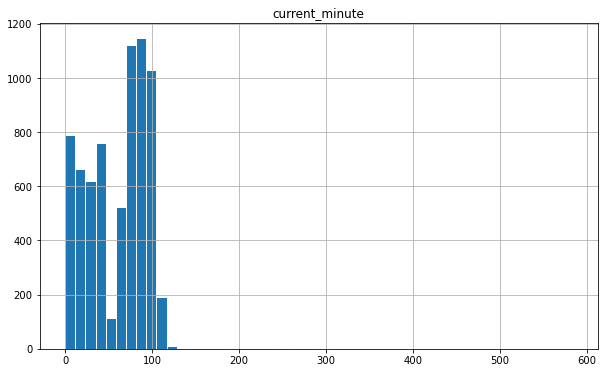

In [24]:
minutes_df = df[["uuid", "current_minute"]]
minutes_df.hist("current_minute", bins=50, edgecolor='w', figsize=(10,6))
plt.show()

# Model training

# Hyperparameter tuning

# Model selection

# Insights and conclusions

# Bibliography
